# AnyoneAI - Sprint Project 01
> E-Commerce Data Pipeline

In this notebook we will first execute all the components of our ELT pipeline and then plot visualizations with the resulting information.


In [1]:
# Importing the necessary libraries
from pandas import DataFrame
from sqlalchemy import create_engine
from typing import Dict
from pathlib import Path

from src.transform import QueryEnum
from src import config
from src.transform import run_queries
from src.extract import extract
from src.load import load
from src.plots import (
    plot_freight_value_weight_relationship,
    plot_global_amount_order_status,
    plot_real_vs_predicted_delivered_time,
    plot_revenue_by_month_year,
    plot_revenue_per_state,
    plot_top_10_least_revenue_categories,
    plot_top_10_revenue_categories,
    plot_top_10_revenue_categories_ammount,
    plot_delivery_date_difference,
    plot_order_amount_per_day_with_holidays,
)

In [2]:
# Create the database sql file
Path(config.SQLITE_BD_ABSOLUTE_PATH).touch()

# Create the database connection
ENGINE = create_engine(rf"sqlite:///{config.SQLITE_BD_ABSOLUTE_PATH}", echo=False)

### 1. Extract

Here you will be extracting the information from different sources.

In [3]:
csv_folder = config.DATASET_ROOT_PATH
public_holidays_url = config.PUBLIC_HOLIDAYS_URL

# 1. Get the mapping of the csv files to the table names.
csv_table_mapping = config.get_csv_to_table_mapping()

# 2. Extract the data from the csv files, holidays and load them into the dataframes.
csv_dataframes = extract(csv_folder, csv_table_mapping, public_holidays_url)

### 2. Load

Using the diferent datasets provided to you, you will store everything into our Data Warehouse.

In [4]:
load(data_frames=csv_dataframes, database=ENGINE)

📤 Cargando tabla: olist_customers (99441 filas)
📤 Cargando tabla: olist_geolocation (1000163 filas)
📤 Cargando tabla: olist_order_items (112650 filas)
📤 Cargando tabla: olist_order_payments (103886 filas)
📤 Cargando tabla: olist_order_reviews (99224 filas)
📤 Cargando tabla: olist_orders (99441 filas)
📤 Cargando tabla: olist_products (32951 filas)
📤 Cargando tabla: olist_sellers (3095 filas)
📤 Cargando tabla: product_category_name_translation (71 filas)
📤 Cargando tabla: public_holidays (14 filas)
✅ Carga de datos en SQLite completada.


### 3. Transform

Here you will be transforming the different queries into tables. There are two sections, one with the revenue related queries, and another with the delivery related queries.

##### 3.1 Revenue queries

In [5]:
from src.transform import run_queries


In [6]:
query_results: Dict[str, DataFrame] = run_queries(database=ENGINE)

In [7]:
# Transforming the revenue_by_month_year query to a table
revenue_by_month_year = query_results[QueryEnum.REVENUE_BY_MONTH_YEAR.value]
revenue_by_month_year

,month_no,month,Year2016,Year2017,Year2018
0,01,None,0.00,37632.57,969967.80
1,02,None,0.00,222270.75,853616.82
2,03,None,0.00,376833.72,1024851.95
3,04,None,0.00,299798.45,1274742.18
4,05,None,0.00,579280.43,1150528.93
5,06,None,0.00,489463.42,1141543.85
6,07,None,0.00,518115.19,925958.79
7,08,None,0.00,609180.34,1319737.66
8,09,None,0.00,652576.48,12875.18
9,10,None,34116.28,740570.40,347.95


In [8]:
# Transforming the top_10_revenue_categories query to a table
top_10_revenue_categories = query_results[QueryEnum.TOP_10_REVENUE_CATEGORIES.value]
top_10_revenue_categories

,Category,Num_order,Revenue
0,health_beauty,8647,1233131.72
1,watches_gifts,5493,1165898.98
2,bed_bath_table,9272,1023434.76
3,sports_leisure,7529,954673.55
4,computers_accessories,6529,888613.62
5,furniture_decor,6307,711927.69
6,housewares,5743,615628.69
7,cool_stuff,3559,610204.10
8,auto,3809,578849.35
9,toys,3803,471097.49


In [9]:
# Transforming the top_10_least_revenue_categories query to a table
top_10_least_revenue_categories = query_results[
    QueryEnum.TOP_10_LEAST_REVENUE_CATEGORIES.value
]
top_10_least_revenue_categories

,Category,Num_order,Revenue
0,security_and_services,2,283.29
1,fashion_childrens_clothes,7,519.95
2,cds_dvds_musicals,12,730.00
3,home_comfort_2,24,760.27
4,flowers,29,1110.04
5,diapers_and_hygiene,25,1500.79
6,arts_and_craftmanship,23,1814.01
7,la_cuisine,13,2054.99
8,fashion_sport,26,2094.52
9,fashio_female_clothing,36,2634.94


In [10]:
# Transforming the revenue_per_state query to a table
revenue_per_state = query_results[QueryEnum.REVENUE_PER_STATE.value]
revenue_per_state

,customer_state,Revenue
0,SP,5769081.27
1,RJ,2055690.45
2,MG,1819277.61
3,RS,861608.40
4,PR,781919.55
5,SC,595208.40
6,BA,591270.60
7,DF,346146.17
8,GO,334294.22
9,ES,317682.65


##### 3.2 Delivery queries

In [11]:
# Transforming the delivery_date_difference query to a table
delivery_date_difference = query_results[QueryEnum.DELIVERY_DATE_DIFFERECE.value]
delivery_date_difference

,State,Delivery_Difference
0,AL,8
1,MA,9
2,BA,10
3,CE,10
4,ES,10
5,SE,10
6,MS,11
7,PI,11
8,RJ,11
9,SC,11


In [12]:
# Transforming the real vs predicted delivered time query to a table per month and year
real_vs_estimated_delivered_time = query_results[QueryEnum.REAL_VS_ESTIMATED_DELIVERED_TIME.value]
real_vs_estimated_delivered_time

,month_no,month,Year2016_real_time,Year2017_real_time,Year2018_real_time,Year2016_estimated_time,Year2017_estimated_time,Year2018_estimated_time
0,01,Jan,NaN,8.60,15.33,NaN,38.09,26.61
1,02,Feb,NaN,10.33,14.67,NaN,34.96,26.10
2,03,Mar,NaN,11.91,15.37,NaN,25.76,22.56
3,04,Apr,NaN,12.81,15.37,NaN,26.81,23.01
4,05,May,NaN,12.94,11.86,NaN,24.91,22.42
5,06,Jun,NaN,11.68,11.72,NaN,24.61,27.80
6,07,Jul,NaN,11.29,9.15,NaN,23.10,22.12
7,08,Aug,NaN,11.00,8.74,NaN,23.49,16.41
8,09,Sep,NaN,12.49,40.15,NaN,22.07,16.97
9,10,Oct,14.48,11.76,114.61,55.31,23.64,30.52


In [13]:
# Transforming the global ammount of order status query to a table
global_ammount_order_status = query_results[QueryEnum.GLOBAL_AMMOUNT_ORDER_STATUS.value]
global_ammount_order_status

,order_status,Ammount
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [14]:
orders_per_day_and_holidays = query_results[
    QueryEnum.ORDERS_PER_DAY_AND_HOLIDAYS_2017.value
]
orders_per_day_and_holidays

,order_count,date,holiday
0,32,1483574400000,0
1,4,1483660800000,0
2,4,1483747200000,0
3,6,1483833600000,0
4,5,1483920000000,0
...,...,...,...
356,167,1514332800000,0
357,146,1514419200000,0
358,135,1514505600000,0
359,97,1514592000000,0


In [15]:
freight_value_weight_relationship = query_results[
    QueryEnum.GET_FREIGHT_VALUE_WEIGHT_RELATIONSHIP.value
]

### 4. Plotting the query tables

Now, we will create plots from the different queries

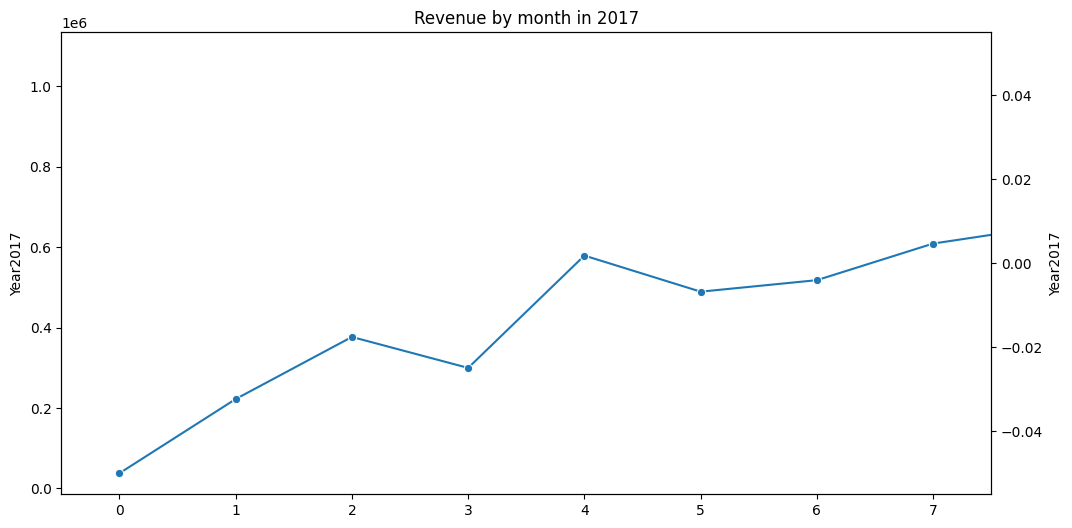

In [16]:
plot_revenue_by_month_year(revenue_by_month_year, 2017)

In [17]:
plot_top_10_revenue_categories(top_10_revenue_categories)

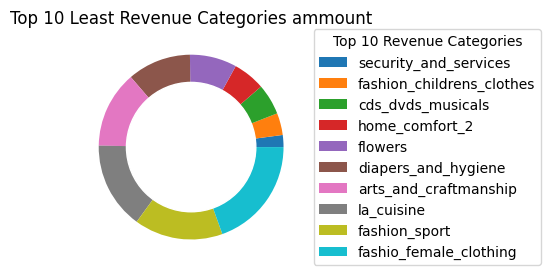

In [18]:
plot_top_10_least_revenue_categories(top_10_least_revenue_categories)

In [19]:
plot_revenue_per_state(revenue_per_state)

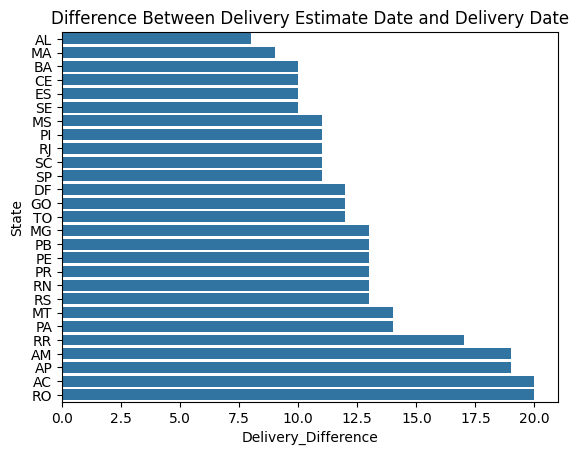

In [20]:
plot_delivery_date_difference(delivery_date_difference)

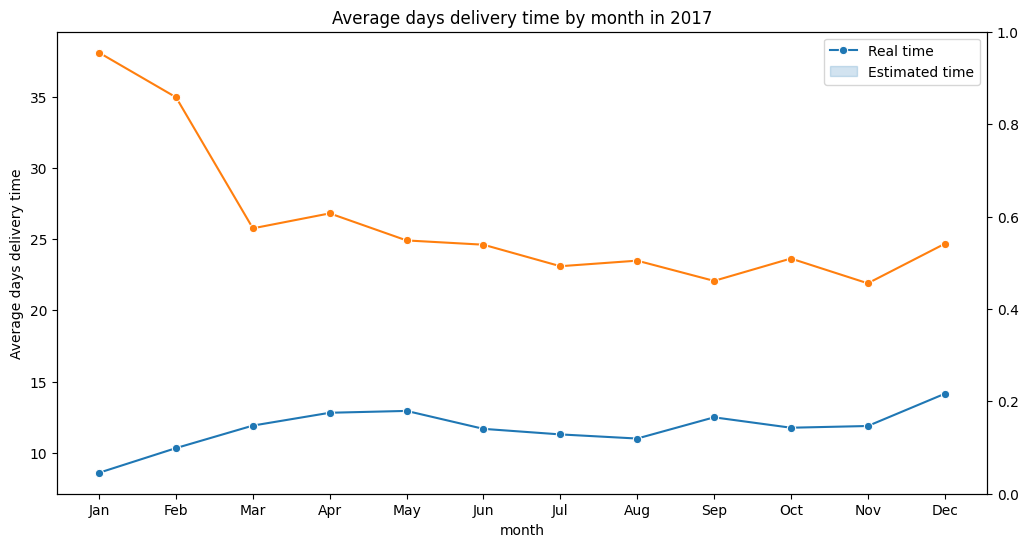

In [21]:
plot_real_vs_predicted_delivered_time(real_vs_estimated_delivered_time, year=2017)

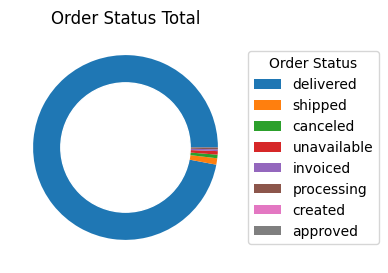

In [22]:
global_ammount_order_status.rename(columns={"total_orders": "Ammount"}, inplace=True)
plot_global_amount_order_status(global_ammount_order_status)


In [23]:
import importlib
import src.plots
importlib.reload(src.plots)



<module 'src.plots' from 'c:\\Users\\pc\\Desktop\\ANYONEAI\\COHORTE2406\\E-Commerce Data Pipeline - Sprint 1\\src\\plots.py'>

In [24]:
src.plots.plot_order_amount_per_day_with_holidays(orders_per_day_and_holidays)


KeyError: 'order_date'

The Orders per Day and Holidays plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/orders_per_day_and_holidays.png "Orders per Day and Holidays")

4.1 Do you see any relationship between the Brazilian public holidays of 2017 and that year's purchases?   
Yes, there is a relationship between Brazilian public holidays in 2017 and purchases. The graph shows noticeable peaks in order volume around some holidays, indicating that customers tend to buy more during these periods.

In [ ]:
import importlib
import src.plots
importlib.reload(src.plots)


<module 'src.plots' from 'c:\\Users\\pc\\Desktop\\ANYONEAI\\COHORTE2406\\E-Commerce Data Pipeline - Sprint 1\\src\\plots.py'>

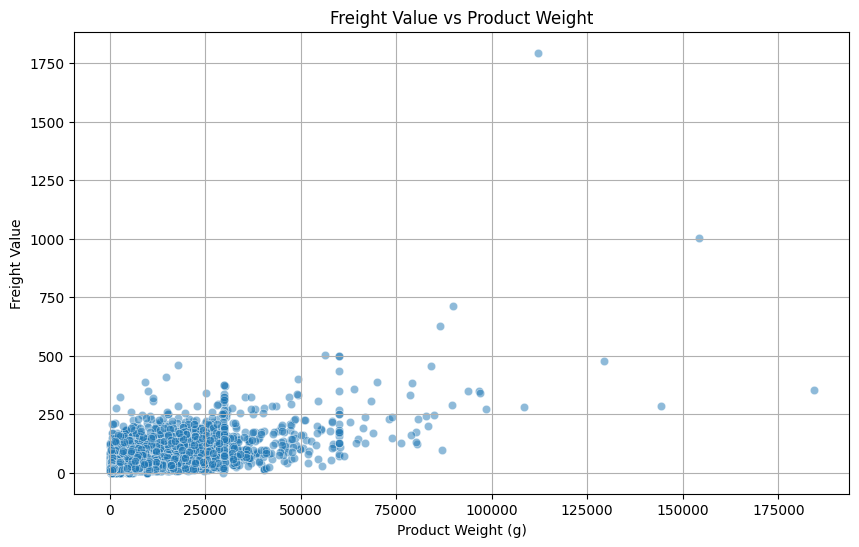

In [ ]:
src.plots.plot_freight_value_weight_relationship(freight_value_weight_relationship)

The Freight Value and Weight Relationship plot you will code in src/plots.py has to be similar to this:

![The plot you will code will be similar to this:](images/freight_value_weight_relationship.png "Freight Value and Weight Relationship")

4.2 Do you see any correlation between the freight value and the product weight?   Yes, there is a weak positive correlation between freight value and product weight. While heavier products tend to have higher shipping costs, the relationship is not strictly linear, as there are some variations and outliers.